<a href="https://colab.research.google.com/github/alex-trindade/DataScience/blob/main/Analisando_Dados_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Referencias
https://www.paho.org/pt/covid19/historico-da-pandemia-covid-19


<center><img src="https://github.com/alex-trindade/DataScience/raw/main/FundoCovid.jpg" width="800"></center>

##1. Panorama da Covid-19
Em 31 de dezembro de 2019, a Organização Mundial da Saúde (OMS) foi alertada sobre vários casos de pneumonia em Wuhan, província de Hubei, República Popular da China. Uma nova cepa (tipo) de coronavírus ainda desconhecida em humanos.

Em 7 de janeiro de 2020, as autoridades chinesas confirmaram que haviam descoberto um novo tipo de coronavírus. O mais recente coronavírus chamado SARS-CoV-2 em 11 de fevereiro de 2020.

Pouco mais de dois anos após o início do da pandemia podemos ver o quão devastador foi poder do vírus. No momento da escrita deste trabalho (14/04/2022) o Covid-19 fez mais de 6,19 milhões de mortes com pouco mais 500 milhões de casos em todo mundo.

Vamos agora através dos dados tentar entender um pouco mais da pandemia.


##2. Obtenção dos Dados

Todos os dados utilizados nesse projeto foram obtidos no repositório da Our World in Data (Owid) no github (https://github.com/owid/covid-19-data/tree/master/public/data).

A Owid é um projeto fundado pelo Dr. Max Roser com o intuito de tornar a informação, acerca dos grandes problemas mundiais, acessível e compreensível.

###2.1 Dicionário de Variáveis
O dicionário completo das variáveis pode ser consultado [aqui](https://github.com/owid/covid-19-data/tree/master/public/data#others), abaixo apresento as principais variáveis que utilizaremos durante o projeto.

*   `iso_code` - Código único de 3 letras que representa o país de acordo com a norma ISO 3166-1
*   `continent` - Continente em que o país se localiza
*   `location` - País
*   `date` - Data da entrada do dado no dataset
*   `total_cases` - Número de casos totais confirmados
*   `new_cases` - Número de novos casos confirmados desde a última atualização do dataset
*   `new_cases_smoothed` - Média móvel dos dados do número de novos casos confirmados (período de 7 dias de Média móvel)
*   `total_deaths` - Número total de óbitos confirmados em decorrência de Covid-19
*   `new_deaths` - Número total de óbitos confirmados em decorrência de Covid-19 desde a última atualização do dataset
*   `new_deaths_smoothed` - Média móvel dos dados do total de óbitos confirmados em decorrência de Covid-19 (período de 7 dias de Média móvel)
*   `total_cases_per_million` - Número de casos totais confirmados a cada 1.000.000 de pessoas
*   `new_cases_per_million` - Número de novos casos confirmados desde a última atualização do dataset a cada 1.000.000 de pessoas
*   `new_cases_smoothed_per_million` - Média móvel dos dados do número de novos casos confirmados a cada 1.000.000 de pessoas (período de 7 dias de Média móvel)
*   `total_deaths_per_million` - Número total de óbitos confirmados em decorrência de Covid-19 a cada 1.000.000 de pessoas
*   `new_deaths_per_million` - Número total de óbitos confirmados em decorrência de Covid-19 desde a última atualização do dataset a cada 1.000.000 de pessoas
*   `new_deaths_smoothed_per_million`- Média móvel dos dados do total de óbitos confirmados em decorrência de Covid-19 a cada 1.000.000 de pessoas (período de 7 dias de Média móvel)

In [2]:
#importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

##3 Análise Exploratória dos Dados
###3.1 Conhecendo os primeiros registros


In [3]:
#Importando a base de dados
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

#Verificando as 5 primeiras colunas
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
#Verificando o tamanho da base
print(f"A Base possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

A Base possui 182655 linhas e 67 colunas.


In [5]:
#identificando os nomes das colunas
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

###3.2 Verificando o tipo dos dados

In [6]:
#Identificando o tipo de variáveis
for chave,valor in zip(df.dtypes.keys(),df.dtypes):
  print(f"{chave} {'_'*(50-len(chave))} {valor}")

iso_code __________________________________________ object
continent _________________________________________ object
location __________________________________________ object
date ______________________________________________ object
total_cases _______________________________________ float64
new_cases _________________________________________ float64
new_cases_smoothed ________________________________ float64
total_deaths ______________________________________ float64
new_deaths ________________________________________ float64
new_deaths_smoothed _______________________________ float64
total_cases_per_million ___________________________ float64
new_cases_per_million _____________________________ float64
new_cases_smoothed_per_million ____________________ float64
total_deaths_per_million __________________________ float64
new_deaths_per_million ____________________________ float64
new_deaths_smoothed_per_million ___________________ float64
reproduction_rate __________________________

In [7]:
#Variável date está no formato object
df.date = pd.to_datetime(df.date)
df.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
human_development_index                           float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

In [8]:
#Identificando valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

weekly_icu_admissions_per_million          0.967622
weekly_icu_admissions                      0.967622
excess_mortality_cumulative_per_million    0.965416
excess_mortality                           0.965416
excess_mortality_cumulative                0.965416
                                             ...   
total_cases                                0.037349
population                                 0.006187
date                                       0.000000
location                                   0.000000
iso_code                                   0.000000
Length: 67, dtype: float64

As colunas com valores ausentes se referem a quantidade de novos pacientes que deram entrada em UTI (por milhões de habitantes). Os dados ausentes não vão influenciar em nossa análise.

In [9]:
#Vamos filtrar apenas o último registro de cada localidade e ordenar pelo número total de casos
max_date = '2022-04-29'
df.loc[df.date == max_date].sort_values(by="total_cases", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
180360,OWID_WRL,NaN,World,2022-04-29,513085948.0,624037.0,617069.429,6234079.0,2512.0,2598.429,...,6.434,34.635,60.130,2.705,72.58,0.737,NaN,NaN,NaN,NaN
72539,OWID_HIC,NaN,High income,2022-04-29,292974375.0,512260.0,509718.714,2373304.0,1585.0,1645.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53889,OWID_EUR,NaN,Europe,2022-04-29,192516327.0,284282.0,296141.429,1817425.0,1044.0,1187.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9567,OWID_ASI,NaN,Asia,2022-04-29,148759563.0,173978.0,182538.714,1428382.0,592.0,688.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54717,OWID_EUN,NaN,European Union,2022-04-29,137123117.0,261554.0,267875.143,1075506.0,654.0,775.857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99456,MAC,Asia,Macao,2022-04-29,82.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,84.24,NaN,NaN,NaN,NaN,NaN
177367,VAT,Europe,Vatican,2022-04-29,29.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,75.12,NaN,NaN,NaN,NaN,NaN
104874,MHL,Oceania,Marshall Islands,2022-04-29,17.0,0.0,0.286,NaN,NaN,NaN,...,NaN,NaN,82.502,2.700,73.70,0.704,NaN,NaN,NaN,NaN
107738,FSM,Oceania,Micronesia (country),2022-04-29,5.0,0.0,0.571,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,67.88,0.620,NaN,NaN,NaN,NaN


In [10]:
#Vamos filtrar apenas o último registro de cada localidade onde a variável continent não esteja nula e ordenar pelo número total mortos
df.loc[(df.date == max_date) & (df.continent.notnull())].sort_values(by="total_deaths", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
172900,USA,North America,United States,2022-04-29,81325716.0,74085.0,53449.714,993588.0,424.0,335.286,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
23692,BRA,South America,Brazil,2022-04-29,30433042.0,14122.0,13477.857,663649.0,185.0,121.000,...,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
76548,IND,Asia,India,2022-04-29,43075864.0,3688.0,2987.429,523803.0,50.0,236.286,...,1.9,20.6,59.550,0.53,69.66,0.645,NaN,NaN,NaN,NaN
136511,RUS,Europe,Russia,2022-04-29,17909924.0,7590.0,7751.857,368166.0,155.0,161.429,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
107274,MEX,North America,Mexico,2022-04-29,5738769.0,958.0,1019.143,324294.0,40.0,37.286,...,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99456,MAC,Asia,Macao,2022-04-29,82.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,84.24,NaN,NaN,NaN,NaN,NaN
104874,MHL,Oceania,Marshall Islands,2022-04-29,17.0,0.0,0.286,NaN,NaN,NaN,...,NaN,NaN,82.502,2.70,73.70,0.704,NaN,NaN,NaN,NaN
107738,FSM,Oceania,Micronesia (country),2022-04-29,5.0,0.0,0.571,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,67.88,0.620,NaN,NaN,NaN,NaN
137888,SHN,Africa,Saint Helena,2022-04-29,4.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.56,NaN,NaN,NaN,NaN,NaN


In [11]:
#Função para colorir a Barra quando a localidade for Brasil
def colorBar(location):
  if location == "Brazil":
    return '#253760'
  else:
    return '#CFCDCE'

In [12]:
#Vamos criar um novo DF apenas com os TOP 5 em números de mortos
df_top5 = df.loc[(df.date == max_date) & (df.continent.notnull())].sort_values(by='total_deaths', ascending=False)
df_top5 = df_top5.head()
df_top5

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
172900,USA,North America,United States,2022-04-29,81325716.0,74085.0,53449.714,993588.0,424.0,335.286,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
23692,BRA,South America,Brazil,2022-04-29,30433042.0,14122.0,13477.857,663649.0,185.0,121.000,...,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
76548,IND,Asia,India,2022-04-29,43075864.0,3688.0,2987.429,523803.0,50.0,236.286,...,1.9,20.6,59.550,0.53,69.66,0.645,NaN,NaN,NaN,NaN
136511,RUS,Europe,Russia,2022-04-29,17909924.0,7590.0,7751.857,368166.0,155.0,161.429,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
107274,MEX,North America,Mexico,2022-04-29,5738769.0,958.0,1019.143,324294.0,40.0,37.286,...,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN


In [13]:
#Função para rotular as barras no gráfico
def autolabel(barras):
  for barra in barras:
    y = '{0:,.0f}'.format(barra.get_height()).replace(',','.')
    ax.annotate(f'{y}',(barra.get_x()+barra.get_width()/2,barra.get_height()),xytext=(0,5),textcoords='offset points',ha='center')


In [14]:
#Gerar subdataset com óbitos mundiais
obitos_mundo = df.loc[ (df.location == "World") & (df.total_deaths > 0) & (df.date == max_date)]
obitos_mundo = obitos_mundo.filter(items = ['date','total_deaths','gdp_per_capita'])

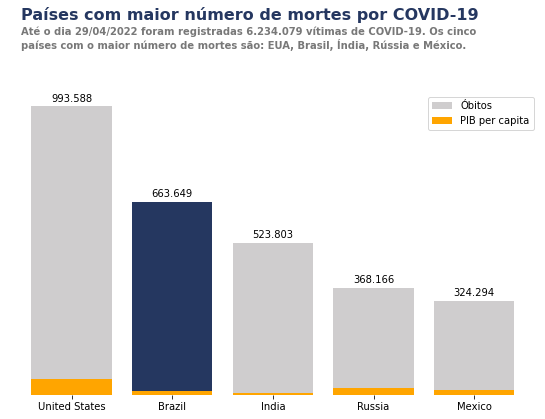

In [15]:
#Criar as variáveis para capturar o número de mortos atuais
ultimo_dia = obitos_mundo['date'].max()
morte_mundo= obitos_mundo['total_deaths'].max()
#Formatar a variável 
morte_mundo= '{0:,.0f}'.format(morte_mundo).replace(',','.')
#Criar o objeto do tipo graáfico
fig, ax = plt.subplots(figsize=(8, 6))
#Criar um objeto do tipo bar x=localidade e y=total de mortes
total_mortes = ax.bar(df_top5['location'],df_top5['total_deaths'],
                      color=df_top5['location'].apply(colorBar), label="Óbitos")
pib = ax.bar(df_top5['location'],df_top5['gdp_per_capita'],color='orange',label="PIB per capita")

##### REMOVER ELEMENTOS NÃO ESSENCIAIS DA FIGURA

# Remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# Remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)
# Adicionando um título
plt.text(x=-0.5, 
         y=df_top5['total_deaths'].max()*1.3, 
         s='Países com maior número de mortes por COVID-19',
         fontsize=16, 
         color='#253760',
         weight='bold',
)
plt.text(x=-0.5, 
         y=df_top5['total_deaths'].max()*1.2,
         s=f'Até o dia {ultimo_dia.strftime("%d/%m/%Y")} foram registradas {morte_mundo}'+
         ' vítimas de COVID-19. Os cinco\npaíses com o maior número de '
         'mortes são: EUA, Brasil, Índia, Rússia e México.',
         fontsize=10, 
         color='#787878',
         weight='bold',
)
ax.legend()
autolabel(total_mortes)
plt.tight_layout()

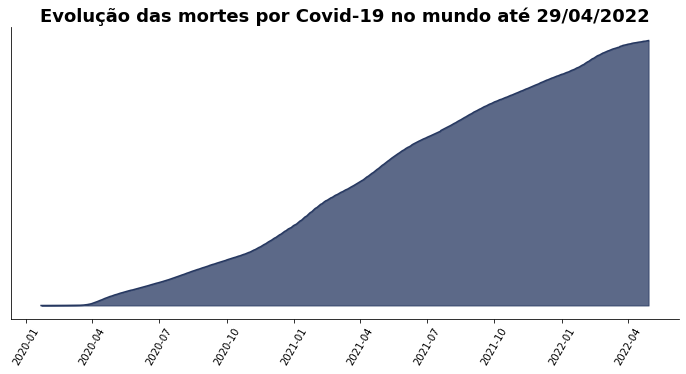

In [16]:
#Gerar subdataset com óbitos mundiais
obitos_mundo = df.loc[ (df.location == "World") & (df.total_deaths > 0)]
obitos_mundo = obitos_mundo.filter(items = ['date','total_deaths','gdp_percapita'])

#Gráfico de com óbitos mundiais

fig, ax = plt.subplots(figsize = (10,5))

x = obitos_mundo['date']
y = obitos_mundo['total_deaths']

#Gerar gráfico linear
ax.plot(x,y,color='#253760')
ax.tick_params(axis = 'x', rotation = 60)
ax.set_title((f'Evolução das mortes por Covid-19 no mundo até {ultimo_dia.strftime("%d/%m/%Y")}') , 
                fontsize ='18',
                fontweight = 'bold')
ax.fill_between(x,y, alpha = 0.75, color='#253760')
##### REMOVER ELEMENTOS NÃO ESSENCIAIS DA FIGURA

# Remover grids e eixos
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
# Remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

plt.tight_layout(pad = 0)


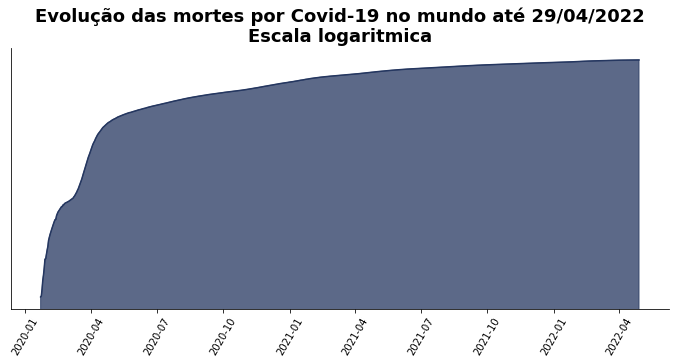

In [17]:
#Gráfico de com óbitos mundiais

fig, ax = plt.subplots(figsize = (10,5))

x = obitos_mundo['date']
y = obitos_mundo['total_deaths']

#Gerar gráfico linear
ax.plot(x,y,color='#253760')

ax.tick_params(axis = 'x', rotation = 60)
ax.set_yscale('log')
ax.set_title((f'Evolução das mortes por Covid-19 no mundo até {ultimo_dia.strftime("%d/%m/%Y")}\nEscala logaritmica') , 
                fontsize ='18',
                fontweight = 'bold')
ax.fill_between(x,y, alpha = 0.75, color='#253760')
##### REMOVER ELEMENTOS NÃO ESSENCIAIS DA FIGURA

# Remover grids e eixos
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
# Remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout(pad = 0.5)

In [18]:
#Gerando novo dataset
obitos_mundo  = df.loc[ (df.location != 'Brazil')&(df.continent.notnull()) & (df.total_deaths > 0) & (df.date == max_date)]
obitos_mundo  = obitos_mundo.filter(items = ['location','date','total_deaths_per_million','gdp_per_capita'])
obitos_brasil = df.loc[ (df.location == 'Brazil') & (df.total_deaths > 0) & (df.date == max_date)]
obitos_brasil = obitos_brasil.filter(items = ['location','date','total_deaths_per_million','gdp_per_capita'])

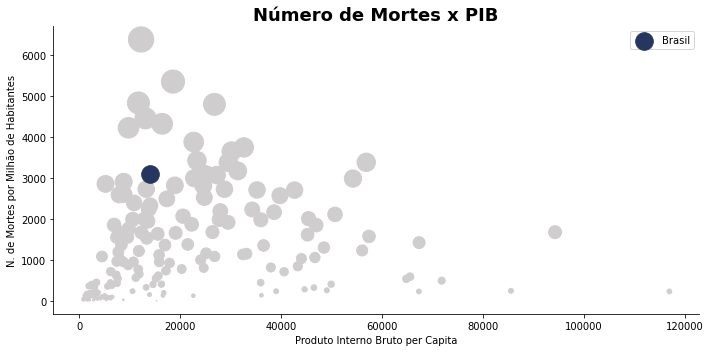

In [19]:
#Gráfico de com óbitos mundiais
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title((f'Número de Mortes x PIB') , 
                fontsize ='18',
                fontweight = 'bold')
obitos_mundo.plot.scatter('gdp_per_capita','total_deaths_per_million',ax=ax, color=obitos_mundo['location'].apply(colorBar),sizes=obitos_mundo['total_deaths_per_million']/10)
obitos_brasil.plot.scatter('gdp_per_capita','total_deaths_per_million',ax=ax, label='Brasil',color=obitos_brasil['location'].apply(colorBar),sizes=obitos_brasil['total_deaths_per_million']/10)

# Remover grids e eixos
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.set_xlabel("Produto Interno Bruto per Capita")
ax.set_ylabel("N. de Mortes por Milhão de Habitantes")
plt.tight_layout()

##Análise dos dados do Brasil

In [20]:
#Criando um novo dataset apenas com os dados do Brasil
df_brasil = df.loc[(df['location'] == 'Brazil') & (df['date'] <= max_date)].copy()
df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
22899,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
22900,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
22901,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
22902,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,7049.6,3.31,5.25,32.943066
22903,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN


In [21]:
#Data do primeiro caso no Brasil
df_brasil.sort_values(by='date').head(1)
primeiro_caso = df_brasil.date.loc[22899]
primeiro_caso

Timestamp('2020-02-26 00:00:00')

In [22]:
#Data da primeira morte no Brasil
df_brasil.loc[df_brasil['total_deaths'] > 0].sort_values(by='date',ascending=False).head(1)



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
23692,BRA,South America,Brazil,2022-04-29,30433042.0,14122.0,13477.857,663649.0,185.0,121.0,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN


In [23]:
#Filtrar apenas a partir do primeiro caso
df_brasil = df_brasil.loc[df_brasil['total_cases']> 0 ]
df_brasil.shape

(794, 67)

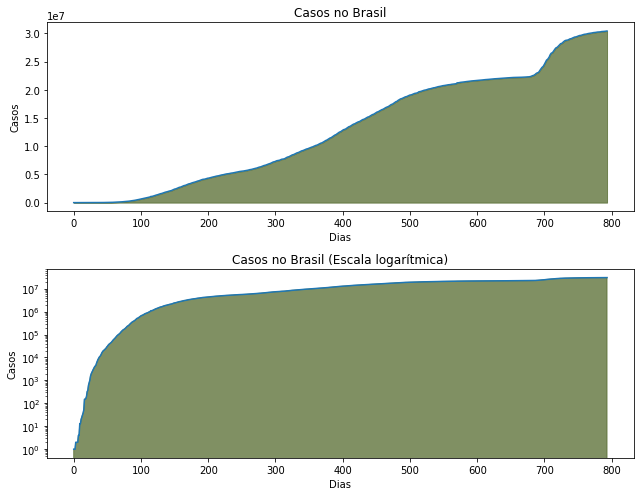

In [24]:
# Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.
x = list(range(df_brasil.shape[0]))
y = df_brasil['total_cases']


fig, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(9, 7))
ax1.set_title('Casos no Brasil')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(x, y)
ax1.fill_between(x,y, alpha = 0.75, color = "darkolivegreen")

ax2.set_title('Casos no Brasil (Escala logarítmica)')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.set_yscale('log')
ax2.plot(x, y)
ax2.fill_between(x,y, alpha = 0.75, color = "darkolivegreen")

plt.tight_layout()


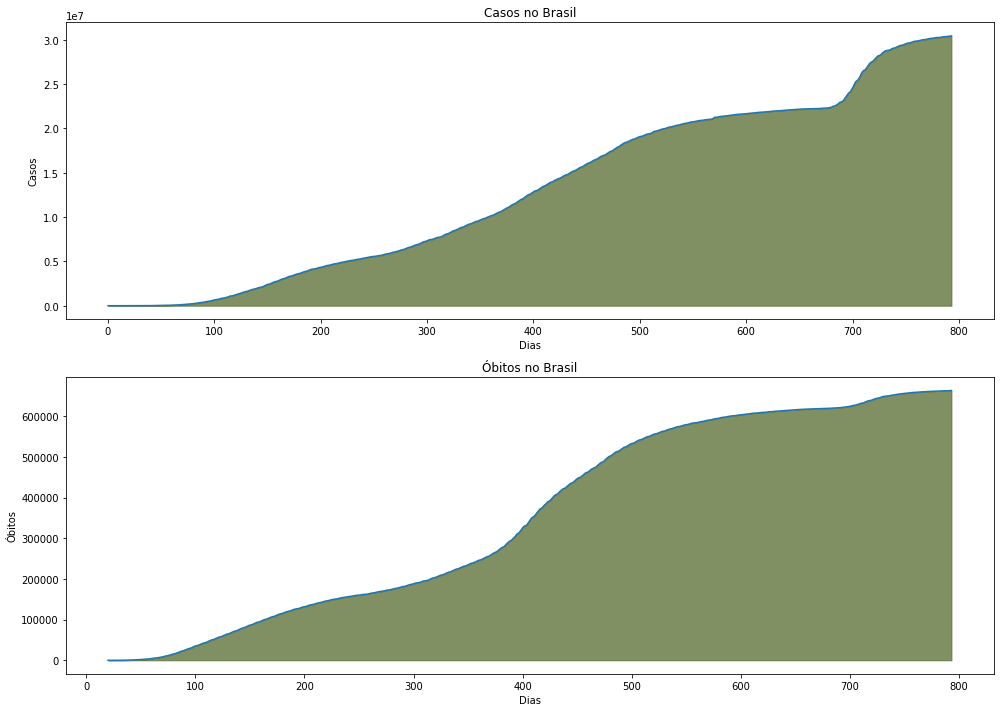

In [25]:
# Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.
x = list(range(df_brasil.shape[0]))
y = df_brasil['total_cases']
z = df_brasil['total_deaths']


fig, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))
ax1.set_title('Casos no Brasil')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(x, y)
ax1.fill_between(x,y, alpha = 0.75, color = "darkolivegreen")

ax2.set_title('Óbitos no Brasil')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Óbitos')
ax2.plot(x, z)
ax2.fill_between(x,z, alpha = 0.75, color = "darkolivegreen")

plt.tight_layout()

In [43]:
#Dados sobre a Vacinação
df_vacinacao_world = df[['iso_code','continent','location','date','total_cases','new_cases',
                         'total_deaths','new_vaccinations','total_vaccinations_per_hundred',
                         'people_vaccinated_per_hundred','people_fully_vaccinated',
                         'people_fully_vaccinated_per_hundred','new_deaths']].copy()
#Retirar valores compilados por total de região/continente
df_vacinacao_world = df_vacinacao_world.loc[df_vacinacao_world.location == "World" ]
df_vacinacao_Brasil = df[['iso_code','continent','location','date','total_cases','new_cases',
                         'total_deaths','new_vaccinations','total_vaccinations_per_hundred',
                         'people_vaccinated_per_hundred','people_fully_vaccinated',
                         'people_fully_vaccinated_per_hundred','new_deaths']].copy()
#Retirar valores compilados por total de região/continente
df_vacinacao_Brasil = df_vacinacao_Brasil.loc[df_vacinacao_Brasil.location == "Brazil" ]
df_vacinacao_Brasil


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,new_deaths
22899,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22900,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22901,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22902,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22903,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,BRA,South America,Brazil,2022-04-25,30355919.0,6456.0,662964.0,301413.0,199.53,85.25,163400967.0,76.36,73.0
23689,BRA,South America,Brazil,2022-04-26,30378061.0,22142.0,663108.0,275490.0,199.66,85.26,163481925.0,76.40,144.0
23690,BRA,South America,Brazil,2022-04-27,30399004.0,20943.0,663350.0,916333.0,200.09,85.29,163675729.0,76.49,242.0
23691,BRA,South America,Brazil,2022-04-28,30418920.0,19916.0,663464.0,569436.0,200.36,85.31,163815874.0,76.55,114.0


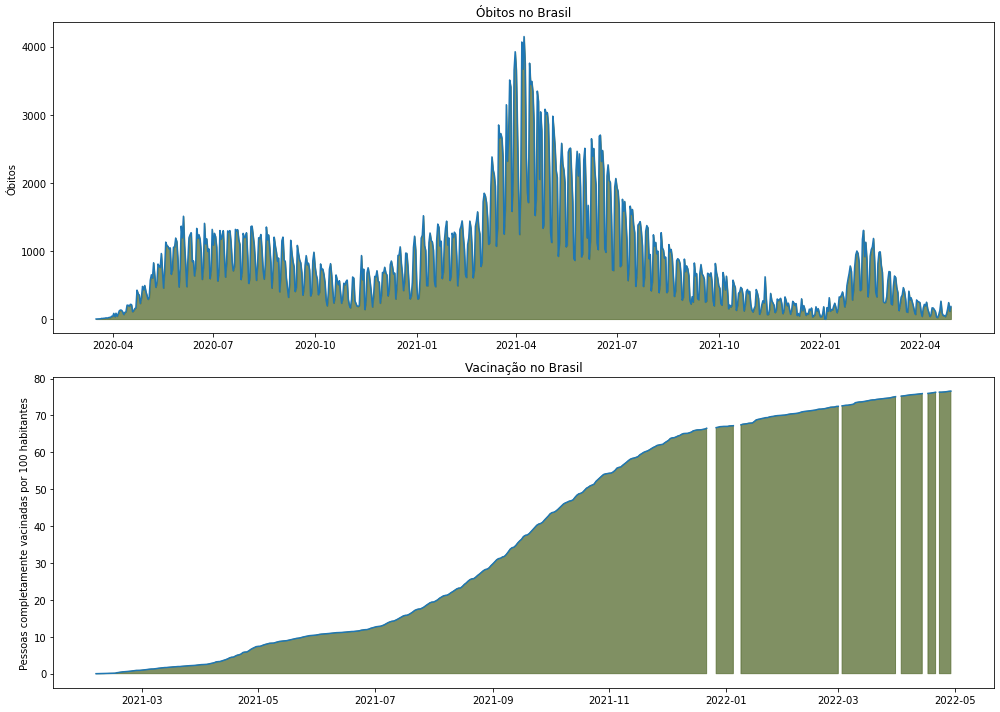

In [54]:
#x = list(range(df_vacinacao_Brasil.shape[0]))
x = df_vacinacao_Brasil['date']
y = df_vacinacao_Brasil['new_deaths']
x1 = df_vacinacao_Brasil['date']
y1 = df_vacinacao_Brasil['people_fully_vaccinated_per_hundred']

fig, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))
ax1.set_title('Óbitos no Brasil')
ax1.set_ylabel('Óbitos')
ax1.plot(x, y)
ax1.fill_between(x,y, alpha = 0.75, color = "darkolivegreen")

ax2.set_title('Vacinação no Brasil')
ax2.set_ylabel('Pessoas completamente vacinadas por 100 habitantes')
ax2.plot(x1, y1)
ax2.fill_between(x1,y1, alpha = 0.75, color = "darkolivegreen")

plt.tight_layout()